In [115]:
import numpy as np
import os, argparse
import tensorflow as tf
import matplotlib as mlp
import matplotlib.pyplot as plt
from PIL import Image
#from lapjv import lapjv
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from tensorflow.python.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Flatten

In [116]:
def build_model():
    base_model = VGG16(weights='imagenet')
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    top_model.summary()
    return Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [122]:
in_dir = '/home/ictd/Desktop/Arpit/Satellite project/data/landsat/karnataka'
global tsne_iter
tsne_iter = 500
global perplexity
perplexity =30
global to_plot
to_plot =1400
global out_res
out_res = 224

In [118]:
def load_img(in_dir):
    pred_img = [f for f in os.listdir(in_dir) if os.path.isfile(os.path.join(in_dir, f))]
    print(len(pred_img))
    img_collection = []
    for idx, img in enumerate(pred_img):
        img = os.path.join(in_dir, img)
        img_collection.append(image.load_img(img, target_size=(out_res, out_res)))
    #if (np.square(out_dim) > len(img_collection)):
        #raise ValueError("Cannot fit {} images in {}x{} grid".format(len(img_collection), out_dim, out_dim))
    return img_collection

In [119]:
def get_activations(model, img_collection):
    activations = []
    for idx, img in enumerate(img_collection):
        #if idx == to_plot:
        #    break;
        #print("Processing image {}".format(idx+1))
        img = img.resize((224, 224), Image.ANTIALIAS)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        activations.append(np.squeeze(model.predict(x)))
    return activations

In [120]:
model2 = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1000)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [124]:
img_collection = load_img(in_dir=in_dir)

26275


IOError: [Errno 24] Too many open files: '/home/ictd/Desktop/Arpit/Satellite project/data/landsat/karnataka/616413.png'

In [21]:
activations = get_activations(model2, img_collection)

In [22]:
def generate_tsne(activations):
    print(type(activations))
    tsne = TSNE(perplexity=perplexity, n_components=2, init='random', n_iter=tsne_iter)
    X_2d = tsne.fit_transform(np.array(activations)[0:to_plot,:])
    X_2d -= X_2d.min(axis=0)
    X_2d /= X_2d.max(axis=0)
    return X_2d

In [23]:
X_2d = generate_tsne(activations)

<type 'list'>


In [24]:
print(type(X_2d))
print(X_2d.shape)

<type 'numpy.ndarray'>
(759, 2)


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

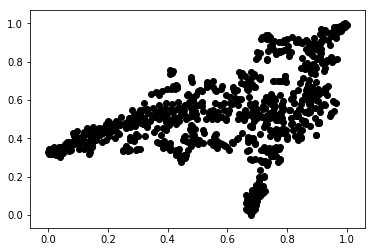

In [26]:
for a,b in X_2d:
    #plt.figure(figsize=(12,12))
    plt.scatter(a,b,color='black')

In [27]:
import pylab

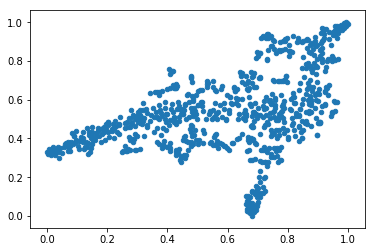

In [28]:
pylab.scatter(X_2d[:, 0], X_2d[:, 1], 20)

In [32]:
import pandas as pd
import os
import glob

In [82]:
df=pd.read_csv('/home/ictd/Desktop/Arpit/Satellite project/Village Label Files/Labels/VillageLabels_FC.csv')
village_code=df["Town/Village"].values
emp_label=df["Village_HHD_Cluster_FC"].values
actual_labels= [ int(c) for c in emp_label]
s1 = pd.Series(actual_labels,index=list(village_code))
s2 = s1.groupby(s1.index).first() 

In [83]:
in_dir = '/home/ictd/Desktop/Arpit/Satellite project/data/landsat/kerala'
dirs1=os.listdir(in_dir)

In [84]:
files=[]
for direc1 in dirs1:
    file1=glob.glob(os.path.join(in_dir,direc1))
    files.extend(file1)

In [85]:
labels_ = []
for i in files:
    k = int(i.split('.')[0][-6:])
    try:
        labels_.append(str(s2[k]))
    except KeyError:
        labels_.append(str(10))

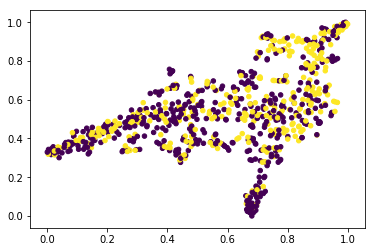

In [86]:
pylab.scatter(X_2d[:, 0], X_2d[:, 1], 20, label=labels_, c=labels_)

In [87]:
set(labels_)

{'1', '3'}

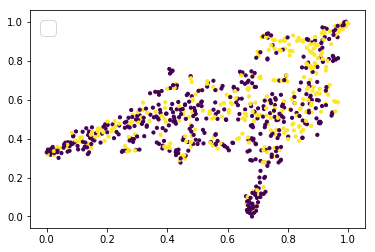

In [88]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], 10, labels_)
ax.legend(loc=2, prop={'size': 20})
#ax.grid(True)
plt.show()